In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

EMA-Filterdefinition

$$y[k] = \alpha * x[k] + (1-\alpha) * y[k-1]$$



No handles with labels found to put in legend.
No handles with labels found to put in legend.


Cutoff-Frequenz [Hz]: 0.05737819215740298 * f_s
287


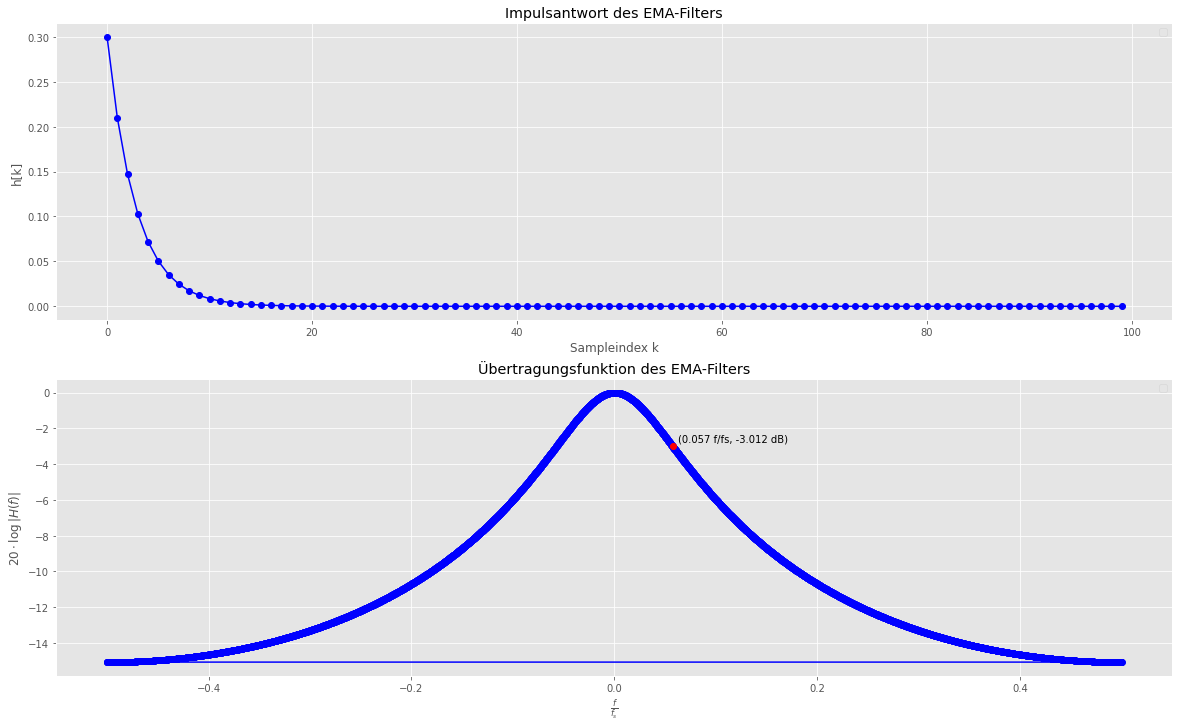

In [33]:
a = 0.3
f_s = 1 #Normierte Samplingfrequenz
f_c = f_s / (2* np.pi) * np.arccos(1- (a**2/(2*(1-a))))
print('Cutoff-Frequenz [Hz]:',f_c, '* f_s')

#Unit Response 
dirac = np.zeros(5000)
dirac[0] = 1

h = np.zeros(len(dirac))
y = 0
#Filter
for i in range (len(h)):
    h[i] = a * dirac[i] + (1-a) * y
    y = h[i]

#Transfer function
H = np.fft.fft(h)
freq = np.fft.fftfreq(h.shape[-1])


#Plot h
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(2,1 ,figsize = (20,12))
ax1.plot(h[:100], 'bo-')
ax1.set_title('Impulsantwort des EMA-Filters')
ax1.set_xlabel('Sampleindex k')
ax1.set_ylabel('h[k]')
ax1.grid(True)
ax1.legend()

#Plot H
# -3dB Datenpunkt finden
index_to_mark = np.argmax(20*np.log10(abs(H)) <= -3)
print(index_to_mark)

ax2.plot(freq,20*np.log10(abs(H)), 'bo-')
ax2.plot(freq[index_to_mark], 20*np.log10(abs(H[index_to_mark])), 'ro')
ax2.annotate(f'({freq[index_to_mark]:.3f} f/fs, {20*np.log10(abs(H[index_to_mark])):.3f} dB)', (freq[index_to_mark], 20*np.log10(abs(H[index_to_mark]))), xytext=(5, 5), textcoords='offset points')

ax2.set_title('Übertragungsfunktion des EMA-Filters')
ax2.set_xlabel(r'$\frac{f}{f_s}$')
ax2.set_ylabel(r'$20 \cdot \log{|H(f)|}$')
ax2.grid(True)
ax2.legend()

plt.savefig('IR_TF.png')



In [10]:
#Generate Input 

#input = np.random.randint(-127, 128, size= 10000)
#np.shape(input)
#np.savetxt('input.txt',input, fmt = '%i')

In [45]:
# Exponential-Moving-Average #
x = np.genfromtxt('Noise.txt') # Eingangssignal
alpha = 0.3
y_last = 0
y = np.zeros(len(x))

# Int16, Fixed-Point Implementierung 
for i in range (len(x)):
    y[i] = np.int16((np.int32((x[i] * 9830))>>15)) + np.int16((np.int32((y_last * 22937))>>15)) # alpha = 0.3 im Format Q0.15
    y_last = y[i]

# Floating-Point Implementierung
for i in range (len(x)):
    y[i] = x[i] * alpha + y_last * (1-alpha)
    y_last = y[i]

np.savetxt('output_noise.txt', y, fmt= '%i')


In [14]:
# Calc Cutoffs
a = np.array([0.001, 0.01, 0.1, 0.2, 0.4, 0.8])
f_c = (1 /(2* np.pi)) * np.arccos(1- (a**2/(2*(1-a))))
np.savetxt('fc_list', f_c, fmt = '%f')

(-6660.000000000002-1.5916157281026244e-12j) (-6660.000000000002-1.5916157281026244e-12j)


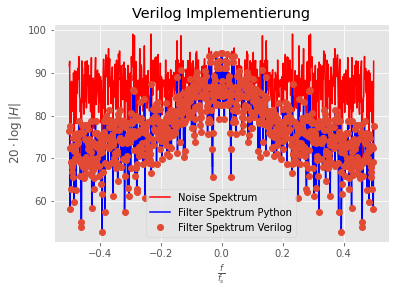

In [48]:
#Plot Outputs

noise = np.genfromtxt('noise.txt')
y_py = np.genfromtxt('output_noise.txt')
y_ver = np.genfromtxt('/Users/dave/Documents/Hardwareentwurf_EMA_Filter/ModelSim/output.txt')

#Calc FFTs
Y_py = np.fft.fftshift(np.fft.fft(y_py[:800]))
freq_py = np.fft.fftshift(np.fft.fftfreq(800))

Y_ver = np.fft.fftshift(np.fft.fft(y_ver[1:801]))
freq_ver = np.fft.fftshift(np.fft.fftfreq(800))

N = np.fft.fftshift(np.fft.fft(noise[:800]))
freq_n = np.fft.fftshift(np.fft.fftfreq(800))

print(Y_py[0], Y_ver[0])

#plot 
plt.style.use('ggplot')
plt.plot(freq_n, 20*np.log10(abs(N)), 'r', label='Noise Spektrum')
plt.plot(freq_py, 20*np.log10(abs(Y_py)), 'b', label='Filter Spektrum Python' )
plt.plot(freq_py, 20*np.log10(abs(Y_ver)), 'o', label='Filter Spektrum Verilog' )
plt.ylabel(r'$20\cdot \log{|H|}$')
plt.xlabel(r'$\frac{f}{f_s}$')
plt.title('Verilog Implementierung')

plt.legend()
plt.savefig('Spec_Vergleich_einzeln.png')
